## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 14,10

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

## Reading the Dataset

In [2]:
df = pd.read_csv('diabetes.csv')
df.shape

(768, 9)

## Preprocessing the Data

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Splitting the dataset into 2 dataframes

In [6]:
a= df.iloc[:,-1]
a

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

## Replacing Zeros in our dataset with NaN

In [7]:
b= df.iloc[:,:-1].replace(0, np.nan)
b

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21
4,NaN,137.0,40.0,35.0,168.0,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63
764,2.0,122.0,70.0,27.0,NaN,36.8,0.340,27
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30
766,1.0,126.0,60.0,NaN,NaN,30.1,0.349,47


## Concatinating the dataframes back to get the complete dataset

In [8]:
dt = pd.concat([b, a],axis=1)
dt

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,NaN,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2.0,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1.0,126.0,60.0,NaN,NaN,30.1,0.349,47,1


## Checking for null values

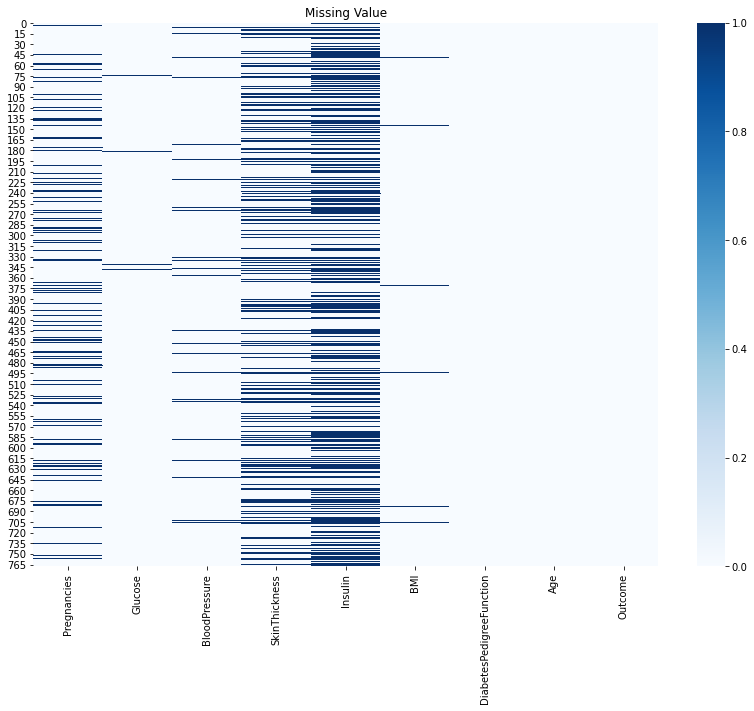

In [9]:
sns.heatmap(dt.isnull(), cmap = 'Blues')
plt.title('Missing Value')
plt.show()

## Dropping null values

In [10]:
df = dt.dropna(axis = 0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 336 entries, 3 to 765
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               336 non-null    float64
 1   Glucose                   336 non-null    float64
 2   BloodPressure             336 non-null    float64
 3   SkinThickness             336 non-null    float64
 4   Insulin                   336 non-null    float64
 5   BMI                       336 non-null    float64
 6   DiabetesPedigreeFunction  336 non-null    float64
 7   Age                       336 non-null    int64  
 8   Outcome                   336 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 26.2 KB


In [11]:
df = df.reset_index()
df

,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
1,6,3.0,78.0,50.0,32.0,88.0,31.0,0.248,26,1
2,8,2.0,197.0,70.0,45.0,543.0,30.5,0.158,53,1
3,13,1.0,189.0,60.0,23.0,846.0,30.1,0.398,59,1
4,14,5.0,166.0,72.0,19.0,175.0,25.8,0.587,51,1
...,...,...,...,...,...,...,...,...,...,...
331,751,1.0,121.0,78.0,39.0,74.0,39.0,0.261,28,0
332,755,1.0,128.0,88.0,39.0,110.0,36.5,1.057,37,1
333,760,2.0,88.0,58.0,26.0,16.0,28.4,0.766,22,0
334,763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63,0


## FINAL DATASET

In [12]:
df = df.iloc[:,1:]
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
1,3.0,78.0,50.0,32.0,88.0,31.0,0.248,26,1
2,2.0,197.0,70.0,45.0,543.0,30.5,0.158,53,1
3,1.0,189.0,60.0,23.0,846.0,30.1,0.398,59,1
4,5.0,166.0,72.0,19.0,175.0,25.8,0.587,51,1
...,...,...,...,...,...,...,...,...,...
331,1.0,121.0,78.0,39.0,74.0,39.0,0.261,28,0
332,1.0,128.0,88.0,39.0,110.0,36.5,1.057,37,1
333,2.0,88.0,58.0,26.0,16.0,28.4,0.766,22,0
334,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63,0


## Data is highly imbalanced

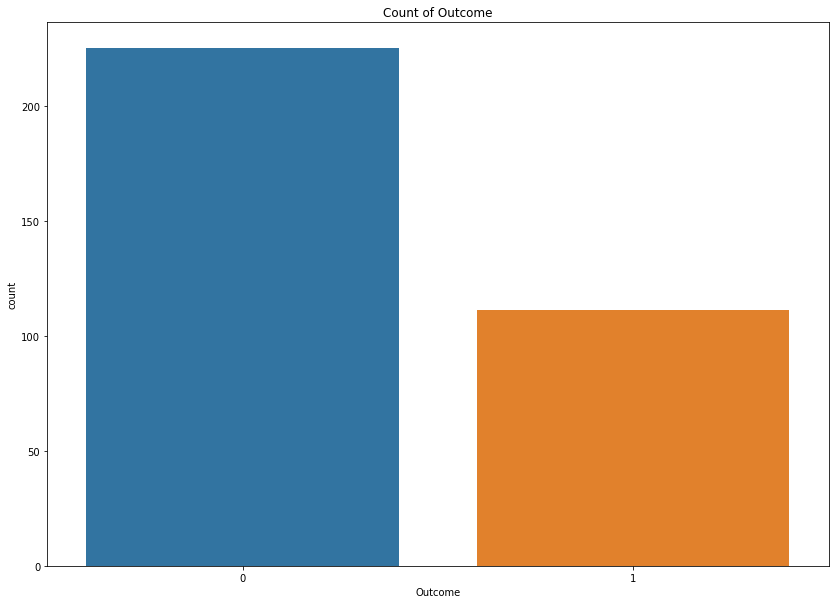

In [13]:
sns.countplot(df['Outcome'])

plt.title('Count of Outcome')
plt.show()

## Balancing the Dataset

In [14]:
df_0 = df[df['Outcome'] == 0]
df_1 = df[df['Outcome'] == 1]
df_0.shape, df_1.shape

((225, 9), (111, 9))

In [15]:
df_0 = df_0.iloc[:111,:]

In [16]:
df_0 = df_0.reset_index()
df_1 = df_1.reset_index()

In [17]:
df_0

,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
1,5,1.0,103.0,30.0,38.0,83.0,43.3,0.183,33,0
2,7,3.0,126.0,88.0,41.0,235.0,39.3,0.704,27,0
3,10,1.0,97.0,66.0,15.0,140.0,23.2,0.487,22,0
4,11,13.0,145.0,82.0,19.0,110.0,22.2,0.245,57,0
...,...,...,...,...,...,...,...,...,...,...
106,169,1.0,125.0,70.0,24.0,110.0,24.3,0.221,25,0
107,170,1.0,119.0,54.0,13.0,50.0,22.3,0.205,24,0
108,172,3.0,100.0,68.0,23.0,81.0,31.6,0.949,28,0
109,173,1.0,100.0,66.0,29.0,196.0,32.0,0.444,42,0


In [18]:
df_1

,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,3.0,78.0,50.0,32.0,88.0,31.0,0.248,26,1
1,2,2.0,197.0,70.0,45.0,543.0,30.5,0.158,53,1
2,3,1.0,189.0,60.0,23.0,846.0,30.1,0.398,59,1
3,4,5.0,166.0,72.0,19.0,175.0,25.8,0.587,51,1
4,6,1.0,115.0,70.0,30.0,96.0,34.6,0.529,32,1
...,...,...,...,...,...,...,...,...,...,...
106,320,3.0,130.0,78.0,23.0,79.0,28.4,0.323,34,1
107,321,2.0,174.0,88.0,37.0,120.0,44.5,0.646,24,1
108,324,11.0,120.0,80.0,37.0,150.0,42.3,0.785,48,1
109,330,3.0,187.0,70.0,22.0,200.0,36.4,0.408,36,1


In [19]:
dt = pd.concat([df_0, df_1],axis=0, ignore_index=False)

In [20]:
dt = dt.reset_index()

In [21]:
dt

,level_0,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,0,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
1,1,5,1.0,103.0,30.0,38.0,83.0,43.3,0.183,33,0
2,2,7,3.0,126.0,88.0,41.0,235.0,39.3,0.704,27,0
3,3,10,1.0,97.0,66.0,15.0,140.0,23.2,0.487,22,0
4,4,11,13.0,145.0,82.0,19.0,110.0,22.2,0.245,57,0
...,...,...,...,...,...,...,...,...,...,...,...
217,106,320,3.0,130.0,78.0,23.0,79.0,28.4,0.323,34,1
218,107,321,2.0,174.0,88.0,37.0,120.0,44.5,0.646,24,1
219,108,324,11.0,120.0,80.0,37.0,150.0,42.3,0.785,48,1
220,109,330,3.0,187.0,70.0,22.0,200.0,36.4,0.408,36,1


In [22]:
dt = dt.iloc[:,2:]
dt

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
1,1.0,103.0,30.0,38.0,83.0,43.3,0.183,33,0
2,3.0,126.0,88.0,41.0,235.0,39.3,0.704,27,0
3,1.0,97.0,66.0,15.0,140.0,23.2,0.487,22,0
4,13.0,145.0,82.0,19.0,110.0,22.2,0.245,57,0
...,...,...,...,...,...,...,...,...,...
217,3.0,130.0,78.0,23.0,79.0,28.4,0.323,34,1
218,2.0,174.0,88.0,37.0,120.0,44.5,0.646,24,1
219,11.0,120.0,80.0,37.0,150.0,42.3,0.785,48,1
220,3.0,187.0,70.0,22.0,200.0,36.4,0.408,36,1


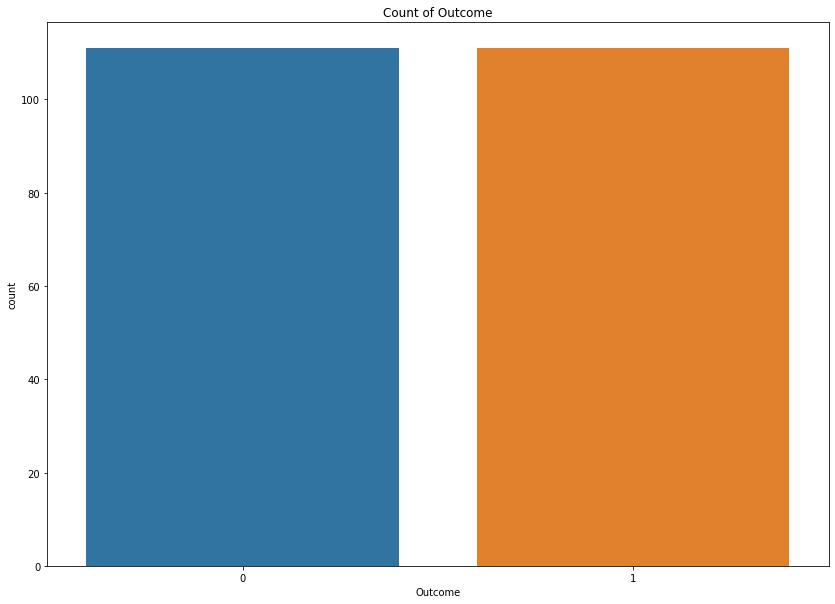

In [23]:
sns.countplot(dt['Outcome'])

plt.title('Count of Outcome')
plt.show()

## LOGISTIC REGRESSION

In [24]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [25]:
X

array([[1.00e+00, 8.90e+01, 6.60e+01, ..., 2.81e+01, 1.67e-01, 2.10e+01],
       [3.00e+00, 7.80e+01, 5.00e+01, ..., 3.10e+01, 2.48e-01, 2.60e+01],
       [2.00e+00, 1.97e+02, 7.00e+01, ..., 3.05e+01, 1.58e-01, 5.30e+01],
       ...,
       [2.00e+00, 8.80e+01, 5.80e+01, ..., 2.84e+01, 7.66e-01, 2.20e+01],
       [1.00e+01, 1.01e+02, 7.60e+01, ..., 3.29e+01, 1.71e-01, 6.30e+01],
       [5.00e+00, 1.21e+02, 7.20e+01, ..., 2.62e+01, 2.45e-01, 3.00e+01]])

In [26]:
y

array([0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

## Feature Scaling

In [28]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [29]:
classifier = LogisticRegression(random_state = 9)

In [30]:
classifier.fit(X_train, y_train)

LogisticRegression(random_state=9)

In [31]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[61  8]
 [13 19]]


0.7920792079207921

## SVC (Support Vector Classifier)

In [32]:
X = dt.iloc[:,:-1]
y = dt.iloc[:,-1]

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 9)

## Feature Scaling

In [34]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [35]:
classifier = SVC(kernel = 'rbf', random_state = 3, max_iter =1000)
classifier.fit(X_train, y_train)

SVC(max_iter=1000, random_state=3)

In [36]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[24  6]
 [ 5 21]]


0.8035714285714286

In [37]:
table = {'Model':['Logistic Regression', 'SVM Classifier'], 
         'Accuracy':['79.20%','80.35%']}
tbl = pd.DataFrame(table)
tbl

tbl.index = ['a','b']

tbl

,Model,Accuracy
a,Logistic Regression,79.20%
b,SVM Classifier,80.35%
